In [6]:
from functions import load_predictions, calculate_mape_dpa
import matplotlib.pyplot as plt

In [7]:
# Experiment 1
n_states = [3, 4, 5, 6, 8]

mapes = {}
dpas = {}

for n in n_states:
    pred_df = load_predictions("AAPL", latency=10, n_states=n)
    pred_df = pred_df[pred_df.experiment_id == 1]
    results = calculate_mape_dpa(pred_df.predicted, pred_df.close, pred_df.open)
    mapes[n] = results["MAPE"]
    dpas[n] = results["DPA"]

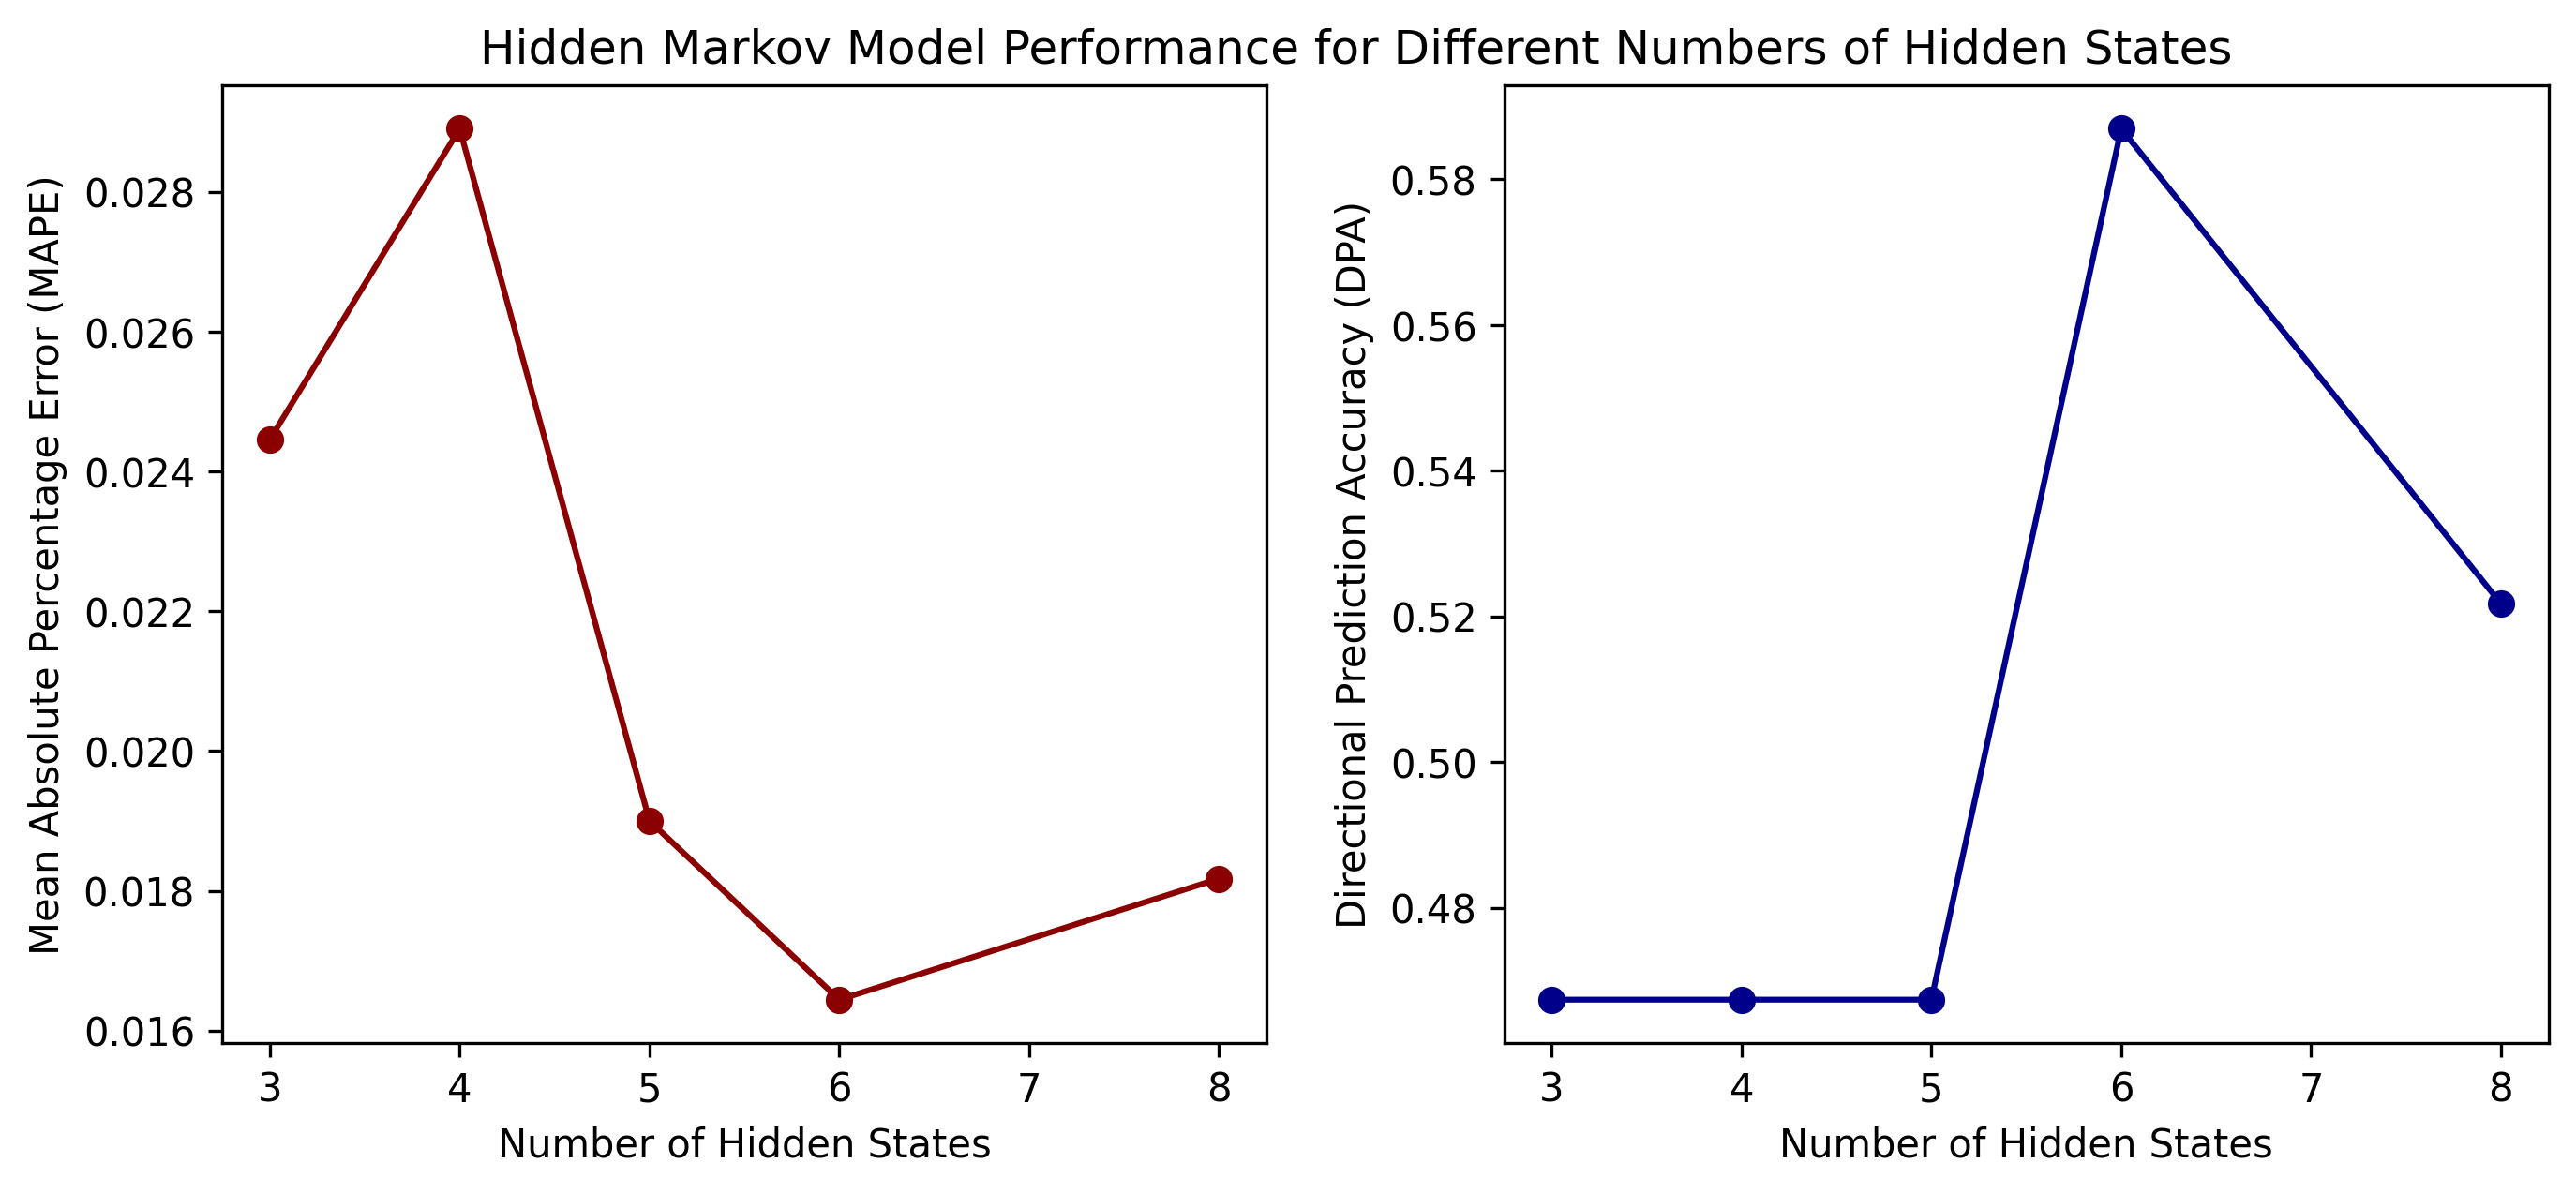

In [8]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4), dpi=300)
fig.tight_layout(w_pad=3)
axs[0].plot(mapes.keys(), mapes.values(), color="darkred")
axs[0].scatter(mapes.keys(), mapes.values(), color="darkred")
axs[0].set_xlabel("Number of Hidden States")
axs[0].set_ylabel("Mean Absolute Percentage Error (MAPE)")
axs[1].plot(dpas.keys(), dpas.values(), color="darkblue")
axs[1].scatter(dpas.keys(), dpas.values(), color="darkblue")
axs[1].set_xlabel("Number of Hidden States")
axs[1].set_ylabel("Directional Prediction Accuracy (DPA)")
fig.suptitle(
    "Hidden Markov Model Performance for Different Numbers of Hidden States",
    y=1
)
plt.savefig("../images/states-testing.png", bbox_inches="tight")
plt.show()

In [9]:
# Experiment 2
latency = [6, 10, 20, 50]

mapes = {}
dpas = {}

for l in latency:
    pred_df = load_predictions("AAPL", latency=l, n_states=4)
    pred_df = pred_df[pred_df.experiment_id == 1]
    results = calculate_mape_dpa(pred_df.predicted, pred_df.close, pred_df.open)
    mapes[l] = results["MAPE"]
    dpas[l] = results["DPA"]

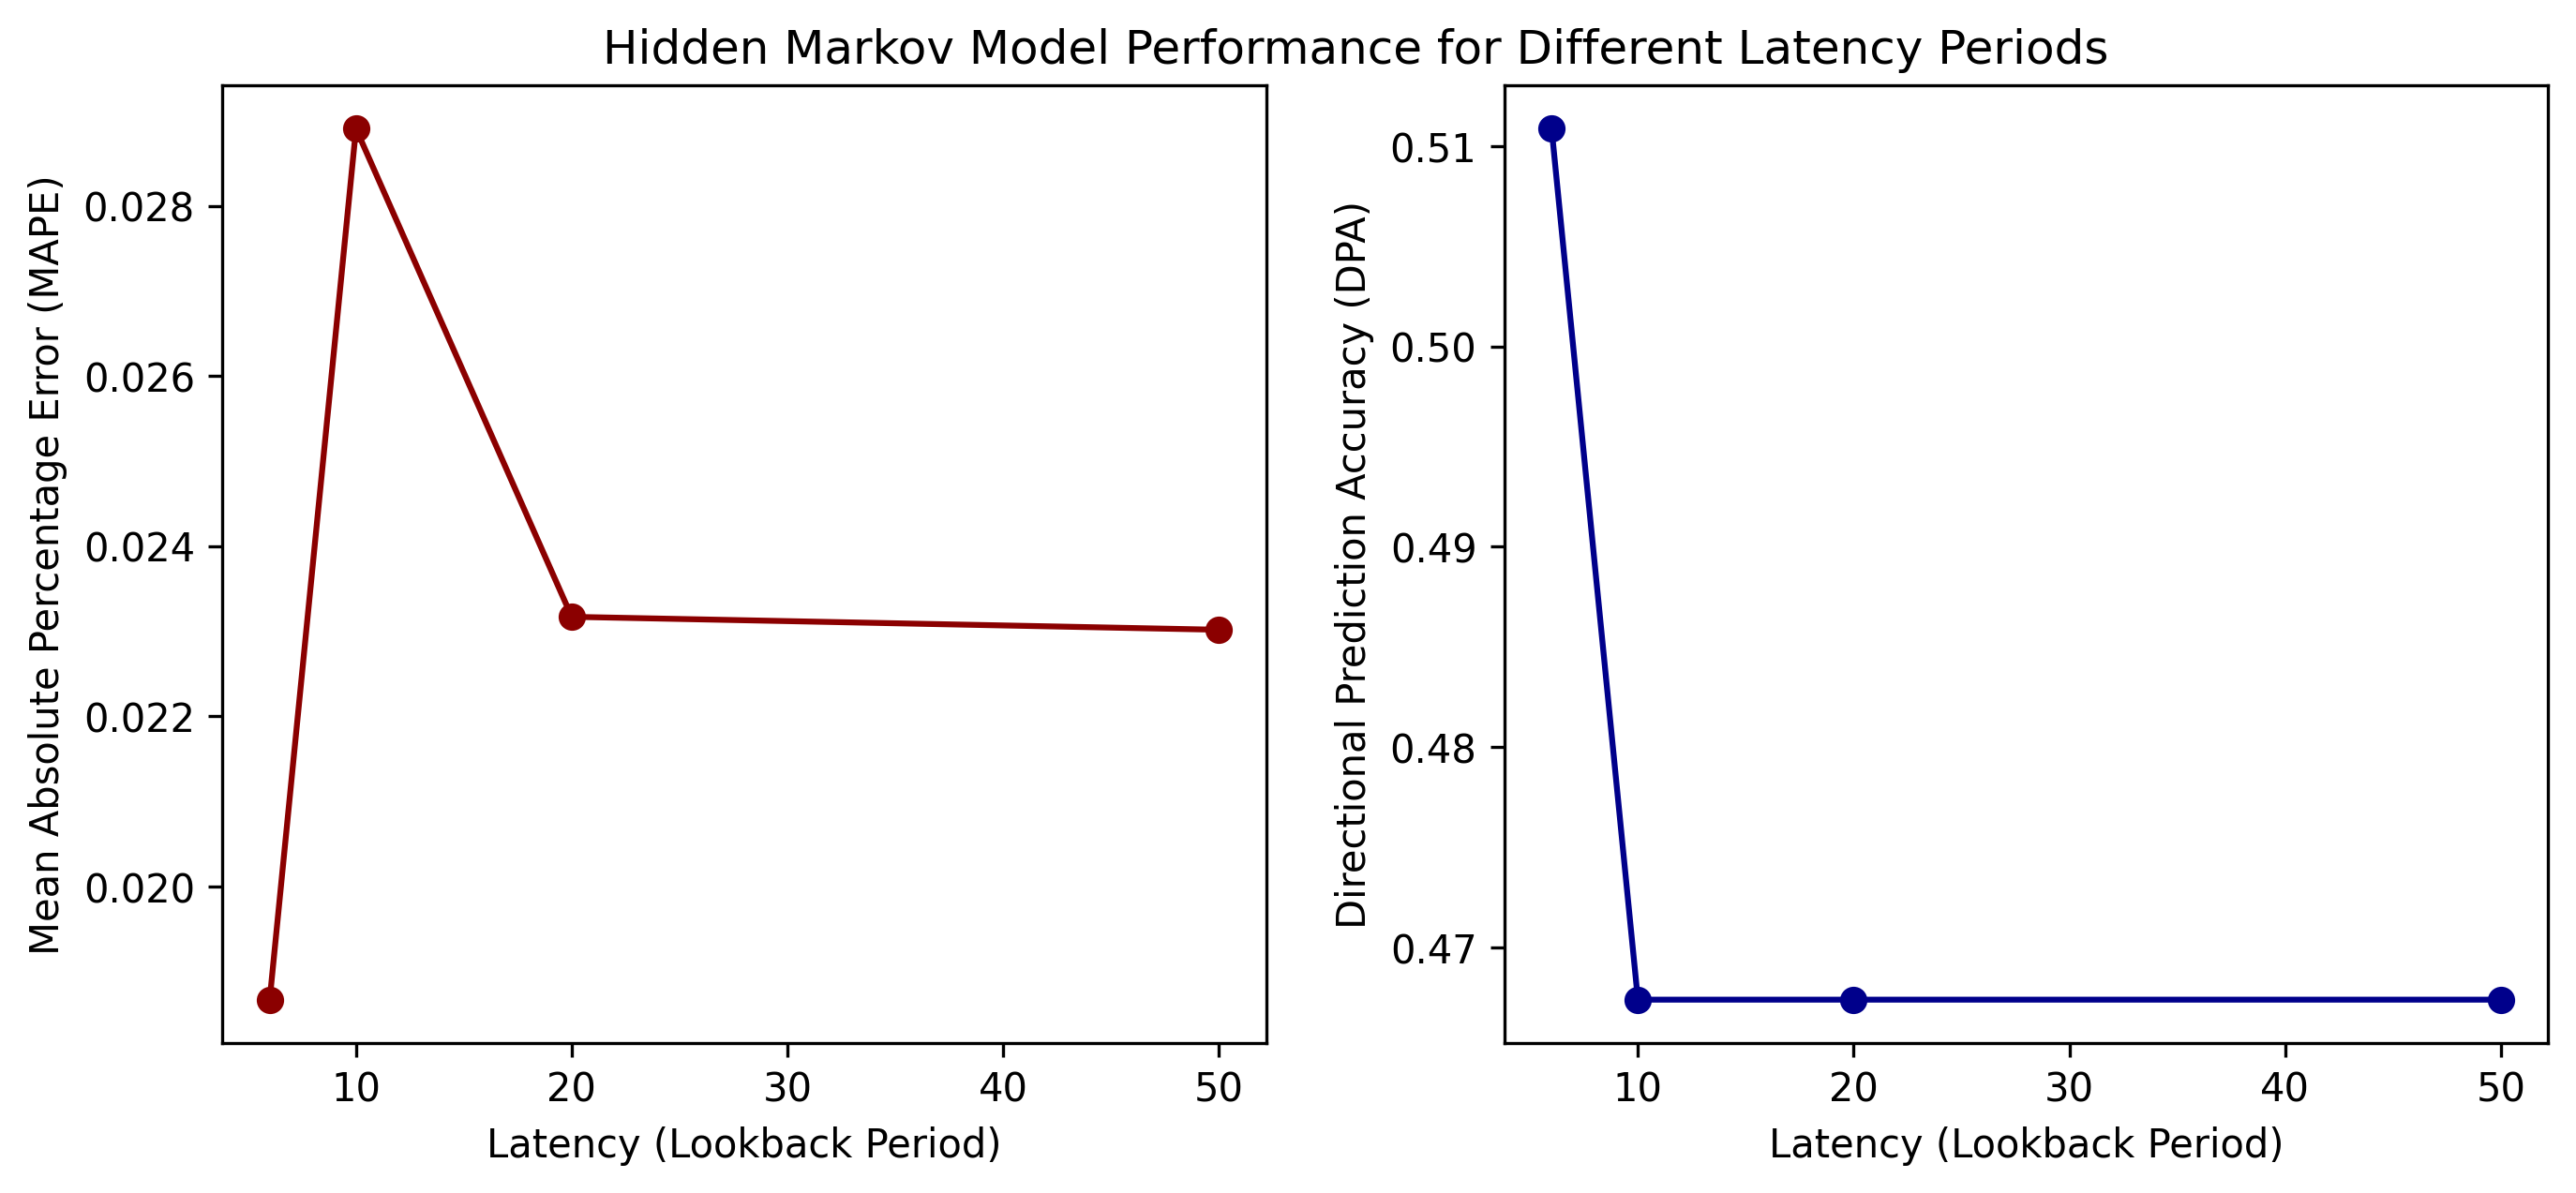

In [10]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4), dpi=300)
fig.tight_layout(w_pad=3)
axs[0].plot(mapes.keys(), mapes.values(), color="darkred")
axs[0].scatter(mapes.keys(), mapes.values(), color="darkred")
axs[0].set_xlabel("Context Window Size")
axs[0].set_ylabel("Mean Absolute Percentage Error (MAPE)")
axs[1].plot(dpas.keys(), dpas.values(), color="darkblue")
axs[1].scatter(dpas.keys(), dpas.values(), color="darkblue")
axs[1].set_xlabel("Context Window Size")
axs[1].set_ylabel("Directional Prediction Accuracy (DPA)")
fig.suptitle(
    "Hidden Markov Model Performance for Different Context Window Sizes", y=1
)
plt.savefig("../images/latency-testing.png", bbox_inches="tight")
plt.show()